# Capstone Project - Car accident severity in Seattle (2004-2020)

This notebook will be used to show the process in our last project for the Data Science Certification.


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)

## Introduction: Business Problem <a name="introduction"></a>

According to the National Safety Council (nsc.org) during 2019 and 2018 the US experience a decline in the number of roadway deaths. It is estimated in 2019 approximately 38,000 people lost their lives due to car crashes. Even though this decline is encouraging the total of people seriously injured in 2019 were 4.4 million(1). This numbers shows why traffic accidents are an important public safety challenge. Further more, in a global perspective, recent projections have estimated that as income and vehicle ownership levels rise in the developing world, “the global number of road traffic deaths would increase by approximately two-thirds by the year 2020” (2). This explains why information is needed in order to guide local and national governments in what are the driving factors and how to prevent car accidents and fatalities.

We believe that using data and the proper analysis we can create prediction models.

Once a solid model is developed we may be able to apply it to different cities and  countries, not only US.

## <a name="data"></a> Data

For this effort we will use the dataset offered in the course. Originally the data was published by the City of Seattle (3) The “All collisions” file is provided by SPD and recorded by Traffic Records. The data is provided as a CSV that is exported from the ArcGIS (4) program used by the city. The application provides geographical data but also 35 other fields with pertinent data for our research. In particular our model will work on predicting SEVERITYCODE, specially fatalities, code 3.

The current data set has 195K records including all types of collisions from 2004 to present. This data includes valuable fields like collision type, date of incident, number of persons injured or dead, if the driver was under the influence, weather, id the vehicle was speeding among others. 

We will also use City_Clerk_Neighborhoods.geojson. A geographical file provided by the City of Seattle with the boundaries of all the neighborhoods in the city. https://data.seattle.gov/dataset/Municipal-Boundaries/54dn-ah5p

In [1]:
# Import the required packages
import pandas as pd
import pylab as pl
import numpy as np

print('Libraries imported.')

Libraries imported.


In [2]:
## Import the data from the City of Seattle
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

collision_df = pd.read_csv("Data-Collisions.csv")

--2020-10-27 04:32:52--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  20.0MB/s    in 3.7s    

2020-10-27 04:32:56 (18.9 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We review the data and the data type to understand what is needed and what fields will work to help in our project.

In [3]:
collision_df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Columns(s) to use: The below listed fields are considered to proceed with our analysis

<li> OBJECTID: ESRI unique identifier<br>
<li> X (longitud), Y (latitude): Geographical coordinates of the collision.<br>
<li> INCDTTM: The date and time of the collision.<br>
<li> ADDRTYPE: Collision address type:Alley, Block or Intersection.<br>
<li> SEVERITYCODE: severity of the collision: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage or 0—unknown<br>
<li> COLLISIONTYPE: Collision type.<br>
<li> PERSONCOUNT: The total number of people involved in the collision.<br>
<li> VEHCOUNT: The number of vehicles involved in the collision. This is entered by the state.<br>
<li> JUNCTIONTYPE:Category of junction at which collision took place.<br>
<li> WEATHER: A description of the weather conditions during the time of the collision.<br>
<li> ROADCOND: The condition of the road during the collision.<br>
<li> LIGHTCOND: The light conditions during the collision.<br>
<li> SPEEDING: Whether or not speeding was a factor in the collision. (Y/N)<br>
<li> ST_COLCODE: A code provided by the state that describes the collision.<br>
<li> ST_COLDESC: A description that corresponds to the state’s coding designation.<br>


### Data Pre-processing and Cleaning:
Creating a new dataframe to with only the selected fields and the proceeding to replace missing data accordingly to make the analysis viable.

In [4]:
seattle_df = collision_df[['OBJECTID', 'X', 'Y', 'INCDATE', 'INCDTTM', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLCODE']].copy()

In [5]:
seattle_df.head()

,OBJECTID,X,Y,INCDATE,INCDTTM,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE
0,1,-122.323148,47.703140,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,Intersection,2,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN,10
1,2,-122.347294,47.647172,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Block,1,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN,11
2,3,-122.334540,47.607871,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Block,1,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN,32
3,4,-122.334803,47.604803,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Block,1,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN,23
4,5,-122.306426,47.545739,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,Intersection,2,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN,10


Finding the missing data in the data frame:Please note some missing data will be replaced with the mean of the value, other with the mode.

In [6]:
missing_data = seattle_df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

ST_COLCODE
False    194655
True

Replacing the missing values:

In [7]:
seattle_df['ADDRTYPE'].value_counts()
seattle_df["ADDRTYPE"].replace(np.nan, "Block", inplace=True)
seattle_df['COLLISIONTYPE'].value_counts()
seattle_df['COLLISIONTYPE'].replace(np.nan, "Parked Car", inplace=True)
seattle_df['JUNCTIONTYPE'].value_counts()
seattle_df['JUNCTIONTYPE'].replace(np.nan, "Mid-Block (not related to intersection)", inplace=True)
seattle_df['WEATHER'].value_counts()
seattle_df['WEATHER'].replace(np.nan, "Clear", inplace=True)
seattle_df['ROADCOND'].value_counts()
seattle_df['ROADCOND'].replace(np.nan, "Dry", inplace=True)
seattle_df['LIGHTCOND'].value_counts()
seattle_df['LIGHTCOND'].replace(np.nan, "Daylight", inplace=True)
seattle_df['ST_COLCODE'].value_counts()
seattle_df['ST_COLCODE'].replace(np.nan, "32", inplace=True)
seattle_df.dropna(subset=["X"], axis=0, inplace=True)
seattle_df.reset_index(drop=True, inplace=True)
seattle_df.set_index('OBJECTID', inplace=True)

Once the data is correctly transformed we can proceed to the analysis.

In [ ]:
missing_data = seattle_df.isnull()
#missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

In [18]:
seattle_df.to_csv('seattle_df.csv')

## Analysis <a name="analysis"></a>

### Data Exploration


Our final dataset includes 187,227 records with 14 distintic attributes:

__X__, or Longitud, and __Y__, or Latitude, are provided and allow us to locate the incident in the proper neighborhood in the City of Seattle. This information allow us to identify the city and neighborhood in Seattle that show the most incidents.

The four neighborhood with them most incidentes are: 
* Industrial District
* Central Business District
* Belltown
* University District



<img src="images/8_Geographical_Distribution.png" width=900 height=600 />



Using the same geographical information we can identify where are most of the cases concentrated.

As indicated before, the Downtown area, Belltown and Central Business District, show are the most incidentes. Also important to highlight, in the south of the city, that there are a lot of incidents in Reiner Ave S, even though this is not a highway. In the north of the city north west of Belltown, 15th Ave W and 15th Ave NW all the way to Holman Rd NW there are a lot of incidents. All those are roads, not highways, but they show a lot of density of incidents may indicate a lot of traffic.

<img src="images/9_Density_Map.png" width=600 height=600 />



__SEVERITYCODE__ is a code that corresponds to the severity of the collision: 
    * 3—fatality
    * 2b—serious injury
    * 2—injury
    * 1—prop damage
    * 0—unknown
Our dataset only shows incidents classified as 1 or 2, injury or property damage, showing no fatalities or serious injuries. This can be caused by a lack of traninig at the moment of recording the incidents or a city policy that prevent the systems from showing fatalities.


<img src="images/1_Severity_Code.png" width=600 height=700 />

Two proxy attributes to SEVERITY CODE are __VEHCOUNT__, the number of vehicles involved in the collision, and __PERSONCOUNT__, the number of pedestrians involved in the collision. When reviewing this attributes their distrubution is very similar to SEVERITY CODE. 

* __PERSONCOUNT__ shows a 67% of the the total pedestrians where affected in incidents classified as PROPERTY DAMANGE, and the other 33% were classified as INJURY.

* __VEHCOUNT__ shows a 71% of the the total pedestrians where affected in incidents classified as PROPERTY DAMANGE, and the other 29% were classified as INJURY.

When analyzing __COLLISIONTYPE__  we notice 62% of all incidents are clasiffied as: Parked Car, Angles or Rear Ended. THe exact distribution is shown in the chart in lines below.


<img src="images/2_Collision_Type.png" width=600 height=400 />



__ST_COLCODE__ provides a more detailed description of the Collision Type. The top three codes are:

ST_COLCODE | Pctg
------ | ----:
One Parked-One Moving | 23%
Entering At Angle | 18%
From Same Direction, Both Moving | 13%



It is clear the __WEATHER__ is not a contributing factor to the accidents in the City of Seattle as 60% of the incidents had clear weather. Only 17% had rain and 14% had some overcast sky. Fromt he total of incidents, 41% of them cause Property Damage and happened during clear weather.



<img src="images/3_Weather.png" width=600 height=400 />

Similartly, __LIGHTCOND__, the light conditions during the incident, show that most of the incidents, 63%, happened at daylight or during night with street lights on, 25%, which raises question if this attribute should be considered as an independent variable in our predictive model.


<img src="images/4_Light_Conditions.png" width=600 height=400 />

__ADDRTYPE__ is a flag to identify if the incidents happened on an alley, an intersection or in the middle of the block. This attribute shows 60% of the incidents occur mid-block, and 48% are mid-block and no related to an intersection.

__JUNCTIONTYPE__ shows 65% of incidents occurring not in an intersection but in the middle of the block. This attribute is corretaled to __ADDRTYPE__.

<img src="images/5_Place.png" width=600 height=400 />

The conditions of the roads, __ROADCOND__, also shows that most of the incidents occurr when there is no problem, with a dry road. Most of those incidentes caused only property damage, 46% of the total.

<img src="images/6_Road_Conditions.png" width=600 height=400 />

__INCDATE__ and __INCDTTM__ are both attributes of data and date-time. __INCDATE__ does not show any seasonality in the incidents. Unfortunately __INCDTTM__ does not include time stamp for all records. 16% of all records do not show the time of the incident. The records with valid time stamp show that most of the accidents occurr from 8 AM to 8 PM, but since we are missing data this observation is not conclusive.

__SPEEDING__, which indicated if whether or not speeding was a factor in the collision shows that only 4% of the incidents are speed related.

## Methodology <a name="methodology"></a>

The information provided by the City of Seattle is plenty but several attributes are correlated, SEVERITY CODE and VEHCOUNT,  incomplete, INCDTTM, or not significant, WHEATER or ROADCON. 

For this exercise the dependent variable will be __Severity Code__, a categorical value. The independent variables will be __Collision Type__, __Address Type__, __Junction Type__, __X__ and __Y__. 

We will focus on identify problematic areas and within those create clusters of locations, (using **K-mean** -ns clustering) and __logistic regression__ with related attributes that help the stakeholder identify problems and spark conversations for possible solutions.

### Predictive Modeling

For this exercise we will use two algotrithims we consider more efficient to the kind of data we use. KNN and Logistic Regression.

In order to use those algorithims we still need to perform some data manipulation so some of the attributes become numeric values.

In [8]:
from sklearn import preprocessing
import itertools

In [9]:
seattle_df['ADDRTYPE'].value_counts()
seattle_df['ADDRTYPE'].replace(to_replace=['Block','Intersection'], value=[0,1],inplace=True)
seattle_df.head()

,X,Y,INCDATE,INCDTTM,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE
OBJECTID,,,,,,,,,,,,,,,
1,-122.323148,47.703140,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,1,2,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN,10
2,-122.347294,47.647172,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,1,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN,11
3,-122.334540,47.607871,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,1,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN,32
4,-122.334803,47.604803,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,0,1,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN,23
5,-122.306426,47.545739,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,1,2,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN,10


In [10]:
seattle_df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.606123
               2               0.393877
Cycles         2               0.876162
               1               0.123838
Head On        1               0.568353
               2               0.431647
Left Turn      1               0.604962
               2               0.395038
Other          1               0.739821
               2               0.260179
Parked Car     1               0.928488
               2               0.071512
Pedestrian     2               0.897726
               1               0.102274
Rear Ended     1               0.568703
               2               0.431297
Right Turn     1               0.793613
               2               0.206387
Sideswipe      1               0.864977
               2               0.135023
Name: SEVERITYCODE, dtype: float64

In [11]:
seattle_df[['X', 'Y', 'ADDRTYPE','COLLISIONTYPE', 'JUNCTIONTYPE']].head()

,X,Y,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE
OBJECTID,,,,,
1,-122.323148,47.703140,1,Angles,At Intersection (intersection related)
2,-122.347294,47.647172,0,Sideswipe,Mid-Block (not related to intersection)
3,-122.334540,47.607871,0,Parked Car,Mid-Block (not related to intersection)
4,-122.334803,47.604803,0,Other,Mid-Block (not related to intersection)
5,-122.306426,47.545739,1,Angles,At Intersection (intersection related)


In [12]:
Feature = seattle_df[['X', 'Y', 'ADDRTYPE']]
Feature = pd.concat([Feature,pd.get_dummies(seattle_df['COLLISIONTYPE'])], axis=1)
Feature.drop(['Cycles'], axis = 1,inplace=True)
Feature.drop(['Head On'], axis = 1,inplace=True)
Feature.drop(['Left Turn'], axis = 1,inplace=True)
Feature.drop(['Pedestrian'], axis = 1,inplace=True)
Feature.drop(['Right Turn'], axis = 1,inplace=True)
Feature.head()

,X,Y,ADDRTYPE,Angles,Other,Parked Car,Rear Ended,Sideswipe
OBJECTID,,,,,,,,
1,-122.323148,47.703140,1,1,0,0,0,0
2,-122.347294,47.647172,0,0,0,0,0,1
3,-122.334540,47.607871,0,0,0,1,0,0
4,-122.334803,47.604803,0,0,1,0,0,0
5,-122.306426,47.545739,1,1,0,0,0,0


In [13]:
Feature = pd.concat([Feature,pd.get_dummies(seattle_df['JUNCTIONTYPE'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature.drop(['At Intersection (but not related to intersection)'], axis = 1,inplace=True)
Feature.head()

,X,Y,ADDRTYPE,Angles,Other,Parked Car,Rear Ended,Sideswipe,At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
OBJECTID,,,,,,,,,,,,,
1,-122.323148,47.703140,1,1,0,0,0,0,1,0,0,0,0
2,-122.347294,47.647172,0,0,0,0,0,1,0,0,0,1,0
3,-122.334540,47.607871,0,0,0,1,0,0,0,0,0,1,0
4,-122.334803,47.604803,0,0,1,0,0,0,0,0,0,1,0
5,-122.306426,47.545739,1,1,0,0,0,0,1,0,0,0,0


Now we are ready to assig the one dependent variable as well as the independent ones. 

In [14]:
y = seattle_df['SEVERITYCODE'].values

In [15]:
X = Feature
X[0:5]

,X,Y,ADDRTYPE,Angles,Other,Parked Car,Rear Ended,Sideswipe,At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
OBJECTID,,,,,,,,,,,,,
1,-122.323148,47.703140,1,1,0,0,0,0,1,0,0,0,0
2,-122.347294,47.647172,0,0,0,0,0,1,0,0,0,1,0
3,-122.334540,47.607871,0,0,0,1,0,0,0,0,0,1,0
4,-122.334803,47.604803,0,0,1,0,0,0,0,0,0,1,0
5,-122.306426,47.545739,1,1,0,0,0,0,1,0,0,0,0


Now we can proceed to evaluate the 2 algorithim for this research.

__KNN__

First we will calculate what value we will assign to K, running the possible values from 1 to 20.

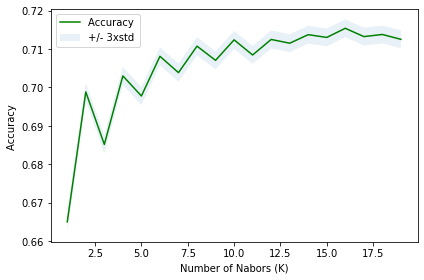

The best accuracy was with 0.7153797401499947 with k = 16


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]= np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

When training our model using the calculated K, we notice the accuracy in lines below:

In [17]:
k = 16
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

#labels
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7458853509912788
Test set Accuracy:  0.7153797401499947


Testing this model for accuracy, the results are:

In [18]:
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score

print(classification_report(y_test,yhat))
print('Jaccard Similarity Score: ',round(jaccard_similarity_score(y_test,yhat)*100,2),'%')
print('F1-SCORE: ',f1_score(y_test,yhat,average=None))
print('Train Accuracy: ',round(metrics.accuracy_score(y_train, neigh.predict(X_train))*100,2),'%')

              precision    recall  f1-score   support

           1       0.75      0.89      0.81     26251
           2       0.57      0.31      0.40     11617

   micro avg       0.72      0.72      0.72     37868
   macro avg       0.66      0.60      0.61     37868
weighted avg       0.69      0.72      0.69     37868

Jaccard Similarity Score:  71.54 %
F1-SCORE:  [0.8134132  0.40028934]
Train Accuracy:  74.59 %


__Linear Regression__

The second model to try is the Linear Regression. Once the model is trained and tested the result are:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score,confusion_matrix 

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
pred_LR = LR.predict(X_test)
pred_LR_prob = LR.predict_proba(X_test)

In [21]:
print(classification_report(y_test,pred_LR))

print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_LR)*100,2),'%')
print('F1-SCORE : ',f1_score(y_test,pred_LR,average=None))
print('Train Accuracy: ',round(metrics.accuracy_score(y_train, LR.predict(X_train))*100,2),'%')

              precision    recall  f1-score   support

           1       0.75      0.91      0.82     26251
           2       0.59      0.30      0.40     11617

   micro avg       0.72      0.72      0.72     37868
   macro avg       0.67      0.61      0.61     37868
weighted avg       0.70      0.72      0.69     37868

Jaccard Similarity Score :  72.26 %
F1-SCORE :  [0.81954538 0.40095819]
Train Accuracy:  72.34 %


When evaluating the log loss the result indicates a fairly realiable model when considering the number of variables in the model.

In [23]:
log_reg_pred = LR.predict_proba(X_test)
log_reg_logloss = log_loss(y_test,log_reg_pred)
print('Log Loss: ',  log_reg_logloss)

Log Loss:  0.5260081931473134


To recap the 2 algorithims tested presented similar accuracy as show:


Algorithm | Jaccard | F1-SCORE | Log Loss
------ | ---- | --- | ---:
KNN | 71.54 % | [0.8134132  0.40028934]
LogisticRegression | 72.26 % | [0.81954538 0.40095819] | 0.526




## Results and Discussion <a name="results"></a>

In this project we have direct our efforts on detecting areas of Seattle where the recorded accidents are located and what independent variables would help predict future incidents.

Our visual analysis helped identify the four neighborhood with more incidents (Industrial District, Central Business District, Belltown and University District) as well as two roads, Reiner Ave S and the stretch from 15th Ave W to 15th Ave NW all the way to Holman Rd NW, which may require city officials to review the flow of traffic due to the high number of accidents. 

It was confirmed that WEATHER, ROAD CONDITIONS and LIGHT CONDITIONS were not are not significant factors in the number of accidents as, for the most part, both conditions were favorable to the driver with clear sky 60%, dry road, 67%, and most of them happening in daylight, 63% of total. SPEED also has little incident in the total number of accidents as only 4% of the accidents were speed related.

The three more common kind of accidents, COLLISION TYPE, are related to parked cars, a car hit by the angle or the car being rear ended, as they amount to 62% of all accidents. Unfortunately we will have continue the analysis to determine if, for example, the collision of parked cars has any relation with the location of nearby universities, in the University District, or retail location, in Belltown or the Central Business District.

As a predictive method we worked KNN and Linear Regressions. The estimated variable was the __SEVERITY CODE__ and the independent variables were __Collision Type__, __Address Type__, __Junction Type__, __Latitude__ and __Longitude__, the latter both geographical variables. 

The two algorithms used to build a predictive model are KNN and logistic regression. When evaluated both algorithms presented similar results, with Logistic Regression presenting a slightly better Jaccard index, 72.26% vs 71.54% for KNN, and a log loss of 0.520 which is fairly good considering the number of independent variables in the model.


## <a name="conclusion"></a> Conclusion

Purpose of this project was to identify descriptive and analytically what are the main variables that determine car accidents in the City of Seattle. We were able to identify the main neighborhoods that have the highest number of incidents, as well as the 2 roads that accumulate the highest density of accidents.

Even though the City of Seattle has fairly complete dataset with the record of accidents and a large list of attributes of those incidents, it was noted some information may be missing or recorded incomplete. SEVERITY CODE only recorded 2 type of collision out of the 4 available, not considering the "unknown" value. Also 16% of the INCDTTM, time stamp attribute, did not have the time value, only de date which is already in the INCDATE field. Stakeholder may need to review internal process in order to collect that data. 

Both the KNN and Logistic Regression algorithms present similar accuracy with the later being slightly better and also faster to perform.

Collision Type, Address Type, Junction Type, Latitude and Longitude are good predictor of the severity of a car accident.

Even though we were able to create a model using KNN and Linear Regression, this exercise can be expanded to explore with more detail the geography and transit loads of the city.

## <a name="references"></a> References

(1) The National Safety Council. Motor Vehicle Deaths Estimated to Have Dropped 2% in 2019. https://www.nsc.org/road-safety/safety-topics/fatality-estimates

(2) Kavi Bhalla et All. A Risk-Based Method for Modeling Traffic Fatalities. Risk Analysis, Vol. 27, No. 1, 2007  

(3) SDOT Traffic Management Division, Traffic Records Group. https://www.seattle.gov

(4) ArcGIS www.esri.com 